In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
import pickle
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity

ModuleNotFoundError: No module named 'lightgbm'

In [17]:
df = pd.read_csv('../data/csv/new_track_vectors_1.csv', index_col=0)
df.shape

(1000, 630)

In [18]:
for i in range(2, 9):
    df = pd.concat([df, pd.read_csv(f'../data/csv/new_track_vectors_{i}.csv', index_col=0)], axis=0)

In [19]:
df = df.reset_index(drop=True)

In [20]:
df.to_csv('../data/csv/merge_df_2.csv')

In [21]:
random.seed(3214)

In [2]:
with open('../data/pickles/main_dict.pickle', 'rb') as f:
    main_dict = pickle.load(f)

In [23]:
main_dict[131792]

{'artist_name': 'Pranavibes',
 'track_title': 'Invitation',
 'artist_tags': [('experimental', '100'),
  ('beatbox', '100'),
  ('didgeridoo', '100'),
  ('vibration', '100'),
  ('Guitare', '100'),
  ('Scie musicale', '100'),
  ('pranavibes', '100')],
 'track_tags': [],
 'similar_tracks': [],
 'similar_list': [],
 'genre': 'Instrumental',
 'all_genres': '[267, 1235]',
 'fma_tags': '[]',
 'all_tags': ['experimental',
  'scie musicale',
  'new age',
  'vibration',
  'beatbox',
  'pranavibes',
  'instrumental',
  'guitare',
  'didgeridoo']}

In [3]:
df = pd.read_csv('../data/csv/merge_df_2.csv', index_col=0)
df

,file,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,...,pitch_salience.min.8,pitch_salience.std.8,chords.max.8,chords.mean.8,chords.min.8,chords.std.8,hpcp.max.8,hpcp.mean.8,hpcp.min.8,hpcp.std.8
0,104356.mp3,-720.516724,187.306152,7.415843,45.811592,-8.024796,14.262546,-17.171432,-22.500401,-24.241632,...,0.126276,0.117759,0.615758,0.494934,0.299043,0.054106,35.823101,20.182158,4.980201,8.573910
1,104086.mp3,-597.070862,103.861496,-10.582519,48.746464,7.793791,1.530691,-11.181722,0.754826,-9.243032,...,0.307251,0.081254,0.691050,0.545705,0.437452,0.055203,35.807785,16.118151,4.551176,8.228011
2,104284.mp3,-680.957092,53.636776,34.963799,28.018169,23.826290,16.978455,21.297728,20.531309,10.419374,...,0.065955,0.137767,0.686681,0.555699,0.286297,0.072372,35.600185,15.170423,3.511198,6.831178
3,104434.mp3,-692.937927,210.235901,4.413802,8.890594,10.425102,18.339258,2.979049,-2.189095,-11.775590,...,0.171400,0.101807,0.726841,0.579549,0.339094,0.089322,29.715958,12.413166,3.462276,3.831624
4,104010.mp3,-652.514038,113.693008,4.883514,30.436319,-5.218509,-6.227454,-7.677907,4.501715,-0.527765,...,0.206535,0.085950,0.698968,0.510325,0.245768,0.085955,35.864719,22.828587,7.057668,8.534819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,143216.mp3,-782.458069,249.506561,38.419746,23.406147,6.784187,18.928421,-0.429123,5.325753,-9.673612,...,0.229411,0.085478,0.760652,0.478432,0.222319,0.133686,35.607765,12.591722,4.013868,5.240017
7978,143239.mp3,-597.664368,151.558838,-17.947746,-0.277920,-6.514028,14.641415,-2.582834,0.849678,3.185655,...,0.309075,0.074787,0.669891,0.491319,0.322971,0.086505,35.737671,11.511922,3.659288,5.345870
7979,143106.mp3,-634.912170,119.112785,4.642046,40.366898,1.609427,-1.351082,-4.156703,3.225143,-5.505558,...,0.190899,0.080346,0.726285,0.529597,0.263394,0.082300,35.819576,16.242168,3.971386,9.540962
7980,143941.mp3,-721.692322,247.704788,-79.438202,-21.225843,-30.294254,-27.226414,-19.510820,-17.776548,-12.668743,...,0.409424,0.070938,0.741104,0.564863,0.349094,0.073692,35.180248,13.532483,4.611664,6.038783


In [4]:
df.drop(df.columns[1:553], axis=1)

,file,average_loudness,dynamic_complexity,beats_count,bpm,onset_rate,danceability,chords_changes,chords_number,mfcc1_mean.8,...,pitch_salience.min.8,pitch_salience.std.8,chords.max.8,chords.mean.8,chords.min.8,chords.std.8,hpcp.max.8,hpcp.mean.8,hpcp.min.8,hpcp.std.8
0,104356.mp3,0.958088,3.018965,67,152.719711,3.297428,0.880183,0.043210,0.009259,-720.424744,...,0.126276,0.117759,0.615758,0.494934,0.299043,0.054106,35.823101,20.182158,4.980201,8.573910
1,104086.mp3,0.937016,0.840037,51,102.857948,2.831125,1.047942,0.018519,0.004630,-595.887695,...,0.307251,0.081254,0.691050,0.545705,0.437452,0.055203,35.807785,16.118151,4.551176,8.228011
2,104284.mp3,0.891895,3.301192,67,135.211700,4.835176,1.937649,0.047913,0.013910,-659.245667,...,0.065955,0.137767,0.686681,0.555699,0.286297,0.072372,35.600185,15.170423,3.511198,6.831178
3,104434.mp3,0.958359,1.519197,47,96.831772,2.864432,1.108624,0.030864,0.007716,-774.598938,...,0.171400,0.101807,0.726841,0.579549,0.339094,0.089322,29.715958,12.413166,3.462276,3.831624
4,104010.mp3,0.869932,3.233905,54,108.971542,3.365344,0.969135,0.047913,0.010819,-659.570374,...,0.206535,0.085950,0.698968,0.510325,0.245768,0.085955,35.864719,22.828587,7.057668,8.534819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,143216.mp3,0.954728,1.702358,76,153.467194,2.801067,0.862295,0.043277,0.010819,-710.497009,...,0.229411,0.085478,0.760652,0.478432,0.222319,0.133686,35.607765,12.591722,4.013868,5.240017
7978,143239.mp3,0.983075,0.808419,57,114.651749,3.197506,1.481192,0.064815,0.016975,-595.786743,...,0.309075,0.074787,0.669891,0.491319,0.322971,0.086505,35.737671,11.511922,3.659288,5.345870
7979,143106.mp3,0.976475,1.572564,68,135.672195,3.397350,1.576762,0.063272,0.007716,-596.092041,...,0.190899,0.080346,0.726285,0.529597,0.263394,0.082300,35.819576,16.242168,3.971386,9.540962
7980,143941.mp3,0.941965,2.035811,52,112.912987,1.731982,1.003118,0.026235,0.009259,-736.138306,...,0.409424,0.070938,0.741104,0.564863,0.349094,0.073692,35.180248,13.532483,4.611664,6.038783


In [5]:
df

,file,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,...,pitch_salience.min.8,pitch_salience.std.8,chords.max.8,chords.mean.8,chords.min.8,chords.std.8,hpcp.max.8,hpcp.mean.8,hpcp.min.8,hpcp.std.8
0,104356.mp3,-720.516724,187.306152,7.415843,45.811592,-8.024796,14.262546,-17.171432,-22.500401,-24.241632,...,0.126276,0.117759,0.615758,0.494934,0.299043,0.054106,35.823101,20.182158,4.980201,8.573910
1,104086.mp3,-597.070862,103.861496,-10.582519,48.746464,7.793791,1.530691,-11.181722,0.754826,-9.243032,...,0.307251,0.081254,0.691050,0.545705,0.437452,0.055203,35.807785,16.118151,4.551176,8.228011
2,104284.mp3,-680.957092,53.636776,34.963799,28.018169,23.826290,16.978455,21.297728,20.531309,10.419374,...,0.065955,0.137767,0.686681,0.555699,0.286297,0.072372,35.600185,15.170423,3.511198,6.831178
3,104434.mp3,-692.937927,210.235901,4.413802,8.890594,10.425102,18.339258,2.979049,-2.189095,-11.775590,...,0.171400,0.101807,0.726841,0.579549,0.339094,0.089322,29.715958,12.413166,3.462276,3.831624
4,104010.mp3,-652.514038,113.693008,4.883514,30.436319,-5.218509,-6.227454,-7.677907,4.501715,-0.527765,...,0.206535,0.085950,0.698968,0.510325,0.245768,0.085955,35.864719,22.828587,7.057668,8.534819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,143216.mp3,-782.458069,249.506561,38.419746,23.406147,6.784187,18.928421,-0.429123,5.325753,-9.673612,...,0.229411,0.085478,0.760652,0.478432,0.222319,0.133686,35.607765,12.591722,4.013868,5.240017
7978,143239.mp3,-597.664368,151.558838,-17.947746,-0.277920,-6.514028,14.641415,-2.582834,0.849678,3.185655,...,0.309075,0.074787,0.669891,0.491319,0.322971,0.086505,35.737671,11.511922,3.659288,5.345870
7979,143106.mp3,-634.912170,119.112785,4.642046,40.366898,1.609427,-1.351082,-4.156703,3.225143,-5.505558,...,0.190899,0.080346,0.726285,0.529597,0.263394,0.082300,35.819576,16.242168,3.971386,9.540962
7980,143941.mp3,-721.692322,247.704788,-79.438202,-21.225843,-30.294254,-27.226414,-19.510820,-17.776548,-12.668743,...,0.409424,0.070938,0.741104,0.564863,0.349094,0.073692,35.180248,13.532483,4.611664,6.038783


In [18]:
test_idx = list()
while len(test_idx) < 100:
    idx = random.randint(0, df.shape[0] - 1)
    if idx in test_idx:
        continue
    track_id = int(df.loc[idx].track[:-4])
    tags = main_dict[track_id]['all_tags']
    if len(tags) >= 10:
        test_idx.append(idx)

KeyError: 'all_tags'

In [6]:
df['id'] = [int(x[:-4]) for x in df['file']]
# df = df.astype({'id':np.int64})

In [121]:
(df_res.drop(columns='id') != df.drop(columns=['id', 'file'])).sum().sum()

0

In [116]:
df

,file,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,...,pitch_salience.std.8,chords.max.8,chords.mean.8,chords.min.8,chords.std.8,hpcp.max.8,hpcp.mean.8,hpcp.min.8,hpcp.std.8,id
0,104356.mp3,-720.516724,187.306152,7.415843,45.811592,-8.024796,14.262546,-17.171432,-22.500401,-24.241632,...,0.117759,0.615758,0.494934,0.299043,0.054106,35.823101,20.182158,4.980201,8.573910,104356
1,104086.mp3,-597.070862,103.861496,-10.582519,48.746464,7.793791,1.530691,-11.181722,0.754826,-9.243032,...,0.081254,0.691050,0.545705,0.437452,0.055203,35.807785,16.118151,4.551176,8.228011,104086
2,104284.mp3,-680.957092,53.636776,34.963799,28.018169,23.826290,16.978455,21.297728,20.531309,10.419374,...,0.137767,0.686681,0.555699,0.286297,0.072372,35.600185,15.170423,3.511198,6.831178,104284
3,104434.mp3,-692.937927,210.235901,4.413802,8.890594,10.425102,18.339258,2.979049,-2.189095,-11.775590,...,0.101807,0.726841,0.579549,0.339094,0.089322,29.715958,12.413166,3.462276,3.831624,104434
4,104010.mp3,-652.514038,113.693008,4.883514,30.436319,-5.218509,-6.227454,-7.677907,4.501715,-0.527765,...,0.085950,0.698968,0.510325,0.245768,0.085955,35.864719,22.828587,7.057668,8.534819,104010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,143216.mp3,-782.458069,249.506561,38.419746,23.406147,6.784187,18.928421,-0.429123,5.325753,-9.673612,...,0.085478,0.760652,0.478432,0.222319,0.133686,35.607765,12.591722,4.013868,5.240017,143216
7978,143239.mp3,-597.664368,151.558838,-17.947746,-0.277920,-6.514028,14.641415,-2.582834,0.849678,3.185655,...,0.074787,0.669891,0.491319,0.322971,0.086505,35.737671,11.511922,3.659288,5.345870,143239
7979,143106.mp3,-634.912170,119.112785,4.642046,40.366898,1.609427,-1.351082,-4.156703,3.225143,-5.505558,...,0.080346,0.726285,0.529597,0.263394,0.082300,35.819576,16.242168,3.971386,9.540962,143106
7980,143941.mp3,-721.692322,247.704788,-79.438202,-21.225843,-30.294254,-27.226414,-19.510820,-17.776548,-12.668743,...,0.070938,0.741104,0.564863,0.349094,0.073692,35.180248,13.532483,4.611664,6.038783,143941


In [109]:
df_res = df[['id'] + list(df.columns[1:630])]

In [112]:
df_res.to_csv('../data/csv/baseline.csv', index=False)

In [96]:
main_dict[66643].keys()

dict_keys(['artist_name', 'track_title', 'artist_tags', 'track_tags', 'similar_tracks', 'similar_list', 'genre', 'all_genres', 'fma_tags', 'all_tags'])

In [84]:
df_info = pd.read_csv('../data/csv/info.csv')
df_info.sample(5)

,id,artist,title,genre,track,tags,test
7569,111395,Fierbinteanu,The Beast Is A Computer In Luxemburg,Pop,111395.mp3,"['pop', 'experimental pop']",0
4579,46855,Monk Turner,Turkey Time,Pop,046855.mp3,"['pop', 'austin', 'creative commons', 'los ang...",0
3140,55711,et_,Tarmac,Rock,055711.mp3,"['rock', 'experimental', 'chillout', 'instrume...",0
6726,64537,Retral,fvneral blves,Electronic,064537.mp3,"['minmal', 'melancholy', 'dubstep', 'garage', ...",0
2341,109977,Phemale,Two Horrible People,Pop,109977.mp3,"['pop', 'synth pop', 'experimental pop', 'seen...",0


In [97]:
df_test_2 = df_info[df_info['test'] == 1][['id']].merge(df, how='left', on='id')
df_test_2.drop(columns='id', inplace=True)
df_test_2.shape

(97, 630)

In [98]:
df.sample(5)

,file,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,...,pitch_salience.std.8,chords.max.8,chords.mean.8,chords.min.8,chords.std.8,hpcp.max.8,hpcp.mean.8,hpcp.min.8,hpcp.std.8,id
2422,136705.mp3,-603.556274,76.977562,13.578789,43.141903,-1.034873,13.402770,-12.282390,2.625969,-3.018370,...,0.093112,0.799274,0.597073,0.336825,0.103847,35.672756,12.029010,3.345469,5.909686,136705
232,145067.mp3,-565.099915,67.468948,5.316288,41.585190,-8.387362,0.673299,7.070295,-3.010958,1.071550,...,0.082464,0.693639,0.489228,0.280466,0.080108,35.455887,9.979208,2.848970,4.975914,145067
1892,124391.mp3,-560.356567,106.547119,-19.315498,14.835472,14.712892,14.014337,-0.766621,2.906938,5.932946,...,0.082847,0.850293,0.645277,0.346109,0.121752,34.458839,11.135730,2.957480,4.666872,124391
711,110765.mp3,-696.067139,127.837563,17.866751,34.082748,12.737347,20.137331,-0.709544,8.192095,8.300987,...,0.140980,0.745731,0.478607,0.202124,0.118887,35.808670,11.844502,3.020409,5.678402,110765
157,118958.mp3,-612.448792,149.275986,-39.287964,37.473297,-8.458055,-0.941940,-10.704618,-1.110281,-2.704869,...,0.114876,0.742453,0.570197,0.337422,0.091344,35.837185,15.457969,3.375268,7.718937,118958


In [101]:
len(set(df_info[df_info['test'] == 1][['id']]['id']) & set(df['id']))

97

In [55]:
df_test_2 = df[df['file'].isin(df_test['track'])]
df_test_2

,file,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,...,pitch_salience.min.8,pitch_salience.std.8,chords.max.8,chords.mean.8,chords.min.8,chords.std.8,hpcp.max.8,hpcp.mean.8,hpcp.min.8,hpcp.std.8
31,113343.mp3,-768.410583,177.532913,-5.232254,-1.268531,-16.643265,-22.899082,-12.472708,-13.560805,-32.071739,...,0.067390,0.145798,0.754852,0.559476,0.225193,0.102047,35.872833,27.349634,7.658070,8.931489
117,099411.mp3,-614.496033,161.632812,-30.135782,20.613056,-3.866533,0.235105,-3.852171,5.199200,4.165448,...,0.322384,0.084757,0.763652,0.476928,0.216093,0.093903,34.102570,11.609141,3.171824,5.582154
150,099419.mp3,-600.287109,152.651749,-6.931434,16.835726,-7.863964,-0.967983,-11.526454,2.808550,3.023355,...,0.418272,0.073019,0.830834,0.591593,0.312676,0.130382,35.713341,10.028034,3.322457,5.291312
179,074421.mp3,-623.853394,122.672737,17.257471,4.505549,0.719744,-2.922961,-5.741470,-1.727011,-18.558123,...,0.247513,0.099405,0.629668,0.534170,0.403778,0.045467,35.743763,15.102151,4.752180,7.138603
290,144469.mp3,-723.618652,252.936325,-30.126852,29.864367,19.096693,-6.951768,-14.872321,-2.849590,0.601918,...,0.204854,0.104727,0.695542,0.541956,0.271407,0.079417,35.818981,15.647316,3.569310,7.347943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,001040.mp3,-563.456299,104.120575,-6.972217,39.065773,12.155280,29.084288,-4.599654,1.194338,-0.117812,...,0.198499,0.118034,0.692115,0.444388,0.283190,0.068971,35.147663,10.454682,2.464400,5.436674
7767,001686.mp3,-665.148071,110.822456,1.305718,19.301023,-8.485282,2.736990,-10.153784,-9.214011,-8.195502,...,0.105094,0.121080,0.801286,0.576270,0.340960,0.093195,35.845860,15.940372,3.966340,7.548143
7822,004079.mp3,-623.008057,93.500755,21.506807,34.539505,5.349083,1.526804,-4.189599,-1.122090,-7.840350,...,0.152666,0.095020,0.746929,0.545348,0.295329,0.100399,35.796947,12.347969,3.913325,5.723447
7842,004835.mp3,-631.604858,120.129745,-22.318903,19.311491,-9.074204,2.220330,-10.822631,-6.159751,1.399805,...,0.027199,0.168232,0.741165,0.527163,0.292858,0.104844,35.861649,11.543086,2.355000,6.220985


In [132]:
df_train_2 = df_info[df_info['test'] == 0][['id']].merge(df, how='left', on='id')
df_train_2.drop(columns='id', inplace=True)
df_train_2.dropna(inplace=True)
df_train_2.shape

(7885, 630)

In [135]:
df_train_2.to_csv('../data/csv/train_2.csv')
df_test_2.to_csv('../data/csv/test_2.csv')

In [40]:
df_train = pd.read_csv('../data/csv/train_2.csv', index_col=0)
df_test = pd.read_csv('../data/csv/test_2.csv', index_col=0)

In [41]:
df_train = df_train.drop(df_train.columns[1:553], axis=1)
df_test = df_test.drop(df_test.columns[1:553], axis=1)

In [42]:
df_train

,file,average_loudness,dynamic_complexity,beats_count,bpm,onset_rate,danceability,chords_changes,chords_number,mfcc1_mean.8,...,pitch_salience.min.8,pitch_salience.std.8,chords.max.8,chords.mean.8,chords.min.8,chords.std.8,hpcp.max.8,hpcp.mean.8,hpcp.min.8,hpcp.std.8
97,071508.mp3,0.959667,1.454141,47,106.572845,5.429099,1.149167,0.075617,0.018519,-587.180603,...,0.328401,0.108953,0.598633,0.430646,0.255573,0.066680,35.795376,12.516487,2.898207,5.515633
98,071225.mp3,0.947680,3.965873,44,89.910225,5.101943,1.217048,0.071097,0.010819,-677.379822,...,0.143351,0.123162,0.623142,0.443237,0.267027,0.079447,35.788826,12.574650,3.081232,5.803203
99,071694.mp3,0.899267,4.684367,47,96.017174,3.896960,1.255007,0.104938,0.009259,-757.620239,...,0.046425,0.203219,0.766795,0.557540,0.362473,0.078869,35.295666,12.708063,3.162239,5.272758
100,071251.mp3,0.951566,1.919403,67,138.033890,4.268293,1.295731,0.044822,0.009274,-609.382568,...,0.074268,0.157959,0.766005,0.586306,0.349384,0.103144,35.791794,12.727301,4.074649,5.878747
101,071885.mp3,0.965423,1.399140,60,139.104752,1.165757,1.090106,0.077160,0.010802,-742.539368,...,0.186028,0.131339,0.683288,0.494685,0.263479,0.094780,35.505161,12.067374,4.002133,4.734721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,143216.mp3,0.954728,1.702358,76,153.467194,2.801067,0.862295,0.043277,0.010819,-710.497009,...,0.229411,0.085478,0.760652,0.478432,0.222319,0.133686,35.607765,12.591722,4.013868,5.240017
7978,143239.mp3,0.983075,0.808419,57,114.651749,3.197506,1.481192,0.064815,0.016975,-595.786743,...,0.309075,0.074787,0.669891,0.491319,0.322971,0.086505,35.737671,11.511922,3.659288,5.345870
7979,143106.mp3,0.976475,1.572564,68,135.672195,3.397350,1.576762,0.063272,0.007716,-596.092041,...,0.190899,0.080346,0.726285,0.529597,0.263394,0.082300,35.819576,16.242168,3.971386,9.540962
7980,143941.mp3,0.941965,2.035811,52,112.912987,1.731982,1.003118,0.026235,0.009259,-736.138306,...,0.409424,0.070938,0.741104,0.564863,0.349094,0.073692,35.180248,13.532483,4.611664,6.038783


In [153]:
features_train = df_train.drop(['file'], 1)
features_test = df_test.drop(['file'], 1)

In [154]:
scaler = StandardScaler()
scaler.fit(features_train)
X_train = scaler.transform(features_train)
X_test = scaler.transform(features_test)

In [155]:
# pca = PCA(0.95)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)

In [156]:
X_train.shape

(7882, 77)

In [157]:
X_test.shape

(100, 77)

In [158]:
# pca.explained_variance_ratio_

In [159]:
neigh = NearestNeighbors(10, metric='manhattan')
neigh.fit(X_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='manhattan',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [160]:
def count_good_recommend(query_idx, answer_list, trhold):
    counter = 0
    query_id = int(df_test.iloc[query_idx].file[:-4])
    relevant = [query_id]
    query_tags = main_dict[query_id]['all_tags']
    for idx in answer_list:
        answer_id = int(df_train.iloc[idx].file[:-4])
        answer_tags = main_dict[answer_id]['all_tags']
        score = 0
        i = 0
        for tag in answer_tags:
            if tag in query_tags:
                i += 1
        if i == 0:
            continue
        
        precision = i / len(answer_tags)
        recall = i / len(query_tags)
        score = 2 * precision * recall / (precision + recall)
        if score >= trhold:        
            counter += 1
            relevant.append(answer_id)
    return counter, relevant

In [161]:
def count_ndcg(neighbors, relevant_list):
    dcg = 0
    idcg = 0
    for i in range(len(neighbors)):
        track = int(df_train.iloc[neighbors[i]].file[:-4])
        if track in relevant_list:
            dcg += 1 / math.log(i + 2, 2)
        idcg += 1 / math.log(i + 2, 2)
    ndcg = dcg / idcg
    return ndcg

In [162]:
mean_ap = 0
ndcg = 0
for i in range(100):
    neighbors = neigh.kneighbors([X_test[i]])[1][0]
    relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
#     print(relevant_list)
#     print(relevant_list[0], [df_train.iloc[x].file[:-4] for x in neighbors])
    p_at_10 = relevant_num / 10
    mean_ap += p_at_10
    ndcg += count_ndcg(neighbors, relevant_list[1:])
mean_ap /= 100 
mean_ndcg = ndcg / 100

In [163]:
mean_ap

0.10599999999999993

In [164]:
mean_ndcg

0.12524688935720543

In [165]:
cos_similarity_mtx = cosine_similarity(X_test, X_train)

In [166]:
mean_ap = 0
ndcg = 0
for i in range(100):
    arr = cos_similarity_mtx[i]
    neighbors = arr.argsort()[-10:][::-1]
    relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
#     print(relevant_list)
#     print(relevant_list[0], [df_train.iloc[x].file[:-4] for x in neighbors])
    p_at_10 = relevant_num / 10
    mean_ap += p_at_10
    ndcg += count_ndcg(neighbors, relevant_list[1:])
mean_ap /= 100 
mean_ndcg = ndcg / 100

In [167]:
print(mean_ap, mean_ndcg)

0.11199999999999993 0.12419061246513172


In [168]:
neigh = NearestNeighbors(100, metric='manhattan')
neigh.fit(X_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='manhattan',
                 metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                 radius=1.0)

In [231]:
truth_score = list()
for i in range(100):
#     neighbors = neigh.kneighbors([X_test[i]])[1][0]
    query_id = int(df_test.iloc[i].file[:-4])
    query_tags = main_dict[query_id]['all_tags']
    temp = list()
    for neighbor in range(len(X_train)):
        answer_id = int(df_train.iloc[neighbor].file[:-4])
        answer_tags = main_dict[answer_id]['all_tags']
        score = 0
        j = 0
        for tag in answer_tags:
            if tag in query_tags:
                j += 1
        if j == 0:
            temp.append((i, neighbor, 0))
            continue

        precision = j / len(answer_tags)
        recall = j / len(query_tags)
        score = 2 * precision * recall / (precision + recall)
        temp.append((i, neighbor, score))
    truth_score.append(temp)

In [232]:
len(truth_score)

100

In [233]:
res_sort =[x[1] for x in sorted(truth_score[2], key=lambda x:x[2], reverse=True)][:10]
res_sort

[4842, 4855, 2400, 4336, 4390, 5524, 5546, 7230, 5227, 6460]

In [1]:
mean_ap = 0
ndcg = 0
for i in range(97):
    neighbors = [x[1] for x in sorted(truth_score[i], key=lambda x:x[2], reverse=True)][:10]
    relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
#     print(relevant_list)
    print(relevant_list[0], [df_train.iloc[x].id[:-4] for x in neighbors])
    p_at_10 = relevant_num / 10
    mean_ap += p_at_10
    ndcg += count_ndcg(neighbors, relevant_list[1:])
mean_ap /= 100 
mean_ndcg = ndcg / 100

NameError: name 'truth_score' is not defined

In [235]:
print(mean_ap, mean_ndcg)

0.9129999999999998 0.9282665190154689


In [228]:
print(mean_ap, mean_ndcg)

0.37200000000000005 0.46940859652090067


In [71]:
mean_ap

0.11199999999999993

In [72]:
mean_ndcg

0.12419061246513172

In [93]:
result = list()
for track in df_train.file.values:
    idx = int(track[:-4])
    if len(main_dict[idx]['all_tags']) >=10:
        result.append(track)
        

In [94]:
len(result)

4013

In [143]:
similarity_1 = list()
# similarity_2 = list()
# similarity_3 = list()
# similarity_4 = list()
# similarity_5 = list()
# similarity_6 = list()
# similarity_7 = list()
# similarity_8 = list()
similarity_9 = list()


In [147]:
while len(similarity_9) < 4000:
    track_1, track_2 = random.sample(result, 2)
    tags_1 = main_dict[int(track_1[:-4])]['all_tags']
    tags_2 = main_dict[int(track_2[:-4])]['all_tags']
    intersection = set(tags_1) & set(tags_2)
    if len(intersection) == 0:
        similarity_9.append((track_1, track_2, 0))
        continue
#     precision = len(intersection) / len(tags_1)
#     recall = len(intersection) / len(tags_2)
#     score = 2 * precision * recall / (precision + recall)
#     score = round(score, 2)
#     if 0 < score < 0.1:
#         similarity_1.append((track_1, track_2, score))


In [150]:
all_similarity = similarity_1 +\
similarity_2 +\
similarity_3 +\
similarity_4 +\
similarity_5 +\
similarity_6 +\
similarity_7 +\
similarity_8 +\
similarity_9

In [152]:
all_similarity = list(set(all_similarity))

In [153]:
len(all_similarity)

34116

In [238]:
sc = [x[2] for x in all_similarity]

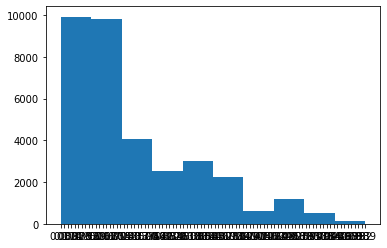

In [239]:
plt.hist(sc)
plt.show()

In [156]:
for tuple in all_similarity:
    with open('../data/tags_similarity.txt', 'a+') as f:
        f.write(f'{tuple[0]} {tuple[1]} {tuple[2]}' + '\n')

In [236]:
with open('../data/tags_similarity.txt', 'r') as f:
    data = f.readlines()

In [237]:
all_similarity = [x.strip('\n').split() for x in data]

In [65]:
df_train_2 = df_train.reset_index(drop=True)
df_train_2

,file,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,...,pitch_salience.min.8,pitch_salience.std.8,chords.max.8,chords.mean.8,chords.min.8,chords.std.8,hpcp.max.8,hpcp.mean.8,hpcp.min.8,hpcp.std.8
0,113360.mp3,-862.656494,206.789871,50.152176,25.817299,16.106518,-1.038179,-14.124306,0.469769,-18.041723,...,0.104731,0.131907,0.839291,0.532144,0.258613,0.124811,35.831059,14.959072,3.070178,7.288480
1,113564.mp3,-645.366455,138.021118,13.892608,22.599394,18.474199,3.581496,-4.732511,-14.586736,-8.281308,...,0.259244,0.097776,0.691749,0.467287,0.207034,0.111577,35.785088,13.921927,2.618005,6.847598
2,113950.mp3,-794.236084,169.969589,26.764826,38.086010,10.864186,12.172462,-6.645301,-3.275297,-9.829071,...,0.112524,0.130163,0.770893,0.615786,0.365535,0.079525,35.804550,15.433070,2.676239,7.629828
3,113267.mp3,-639.567993,129.603104,-77.233673,1.809941,3.417638,-8.119690,-14.168982,9.181040,-12.034758,...,0.273620,0.119000,0.741139,0.547176,0.267749,0.099131,35.739342,10.841406,2.722672,5.521516
4,113261.mp3,-663.177551,117.829987,44.321461,32.515041,4.016469,9.938189,-4.446004,6.427977,-5.873170,...,0.136364,0.138839,0.663160,0.460699,0.237102,0.089502,35.844589,11.433019,3.062327,5.329480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7877,029040.mp3,-688.951660,110.380043,-1.830580,41.865685,12.073243,27.379248,25.519491,18.643660,2.040310,...,0.037965,0.156953,0.627632,0.452549,0.259658,0.089888,35.813511,13.423307,3.492393,6.177996
7878,029255.mp3,-712.312744,168.428848,-79.193497,15.317687,-19.223267,-3.262109,-13.500081,-9.117866,0.947261,...,0.140011,0.139329,0.697704,0.469045,0.260135,0.084404,35.851913,16.614149,0.000000,10.594819
7879,029526.mp3,-781.963379,16.143452,-47.208302,-46.300362,-41.306210,-26.232506,-31.810162,-15.413300,6.781355,...,0.225821,0.115231,0.569408,0.446405,0.227650,0.060741,35.851040,20.483692,4.004978,8.654058
7880,029245.mp3,-628.765808,109.755341,11.579667,35.267372,0.912285,4.590338,4.857110,8.353178,12.665811,...,0.287203,0.092962,0.747907,0.542799,0.222208,0.104758,35.841602,13.581528,3.772308,6.252968


In [165]:
features = list()
target = list()
for tupple in all_similarity:
    idx_1 = df_train_2[df_train_2.file == tupple[0]].index[0]
    idx_2 = df_train_2[df_train_2.file == tupple[1]].index[0]
    arr_1 = X_train[idx_1]
    arr_2 = X_train[idx_2]
    combo = np.hstack((arr_1, arr_2))
    features.append(combo)
    target.append(float(tupple[2]))

In [166]:
features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    random_state=123
)

In [21]:
models = {
    'GBR': {
        'model': GradientBoostingRegressor(),
        'params': {
            'loss':['ls', 'lad', 'huber', 'quantile'],
            'learning_rate': [0.001, 0.01, 0.1],
            'n_estimators': np.arange(80, 200),
            'subsample': np.arange(0.6, 1.01, 0.1),
#             'min_samples_split': np.arange(20, 70),
#             'min_samples_leaf': np.arange(0.1, .51, 0.1),
            'max_features': np.arange(0.1, 1.01, 0.1),
            'max_depth': np.arange(3, 7)
            
        }
    },
    'LinReg': {
        'model': LinearRegression(),
        'params': {}
    },
    'LGBMR': {
        'model': LGBMRegressor(),
        'params': {
            'boosting_type': ['gbdt', 'dart', 'goss'],
            'learning_rate': [0.001, 0.01, 0.1],
            'n_estimators': np.arange(80, 200),
            'subsample': np.arange(0.6, 1.01, 0.1),
            'min_split_gain': np.arange(0.1, 1.01, 0.1),
            
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'kernel': ['rbf', 'linear', 'sigmoid', 'poly'],
            'C': np.arange(0.1, 1.01, 0.1),
            'epsilon': np.arange(0.1, 1.01, 0.1),
            'shrinking': np.arange(0.1, 1.01, 0.1),
            'max_iter': [1000]
        }
    }
}

In [23]:
for model_name in models.keys():
    model = models[model_name]['model']
    params = models[model_name]['params']
    r_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=10,
        scoring='r2',
        n_jobs = -1,
        random_state=123,
        error_score='raise' 
    )
    r_search.fit(features_train, target_train)
    y_pred_train = r_search.predict(features_train)
    y_pred_test = r_search.predict(features_test)
    rmse_train = mean_squared_error(target_train, y_pred_train)
    rmse_test = mean_squared_error(target_test, y_pred_test)
    r2_train = r2_score(target_train, y_pred_train)
    r2_test = r2_score(target_test, y_pred_test)
    print(model)
    print(r_search.best_params_)
#     print(classification_report(target_train, y_pred_train))
#     print(classification_report(target_test, y_pred_test))
    print(f'rmse {rmse_train}/{rmse_test} r2 {r2_train}/{r2_test}')

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
{'subsample': 0.7999999999999999, 'n_estimators': 148, 'max_features': 0.6, 'max_depth': 4, 'loss': 'huber', 'learning_rate': 0.1}


NameError: name 'rmase_train' is not defined

In [26]:
lgbm = LGBMRegressor(subsample=0.7, reg_lambda=0.8, reg_alpha=0.6, n_estimators=174, min_split_gain=0.2, min_child_weight=0.9, max_depth=9, learning_rate=0.1, boosting_type='gbdt')

In [167]:
lgbm = LGBMRegressor(subsample=0.7, reg_lambda=0.8, reg_alpha=0.6, n_estimators=174, min_split_gain=0.2, min_child_weight=0.9, max_depth=9, learning_rate=0.1, boosting_type='gbdt')

In [168]:
lgbm.fit(features_train, target_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=9,
              min_child_samples=20, min_child_weight=0.9, min_split_gain=0.2,
              n_estimators=174, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.6, reg_lambda=0.8, silent=True,
              subsample=0.7, subsample_for_bin=200000, subsample_freq=0)

In [169]:
neigh = NearestNeighbors(100, metric='manhattan')
neigh.fit(X_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='manhattan',
                 metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                 radius=1.0)

In [170]:
def count_good_recommend(query_idx, answer_list, trhold):
    counter = 0
    query_id = int(df_test.iloc[query_idx].file[:-4])
    relevant = [query_id]
    query_tags = main_dict[query_id]['all_tags']
    for idx in answer_list:
        answer_id = int(df_train.iloc[idx].file[:-4])
        answer_tags = main_dict[answer_id]['all_tags']
        score = 0
        i = 0
        for tag in answer_tags:
            if tag in query_tags:
                i += 1
        if i == 0:
            continue
        
        precision = i / len(answer_tags)
        recall = i / len(query_tags)
        score = 2 * precision * recall / (precision + recall)
        if score >= trhold:        
            counter += 1
            relevant.append(answer_id)
    return counter, relevant

In [171]:
def count_ndcg(neighbors, relevant_list):
    dcg = 0
    idcg = 0
    for i in range(len(neighbors)):
        track = int(df_train.iloc[neighbors[i]].file[:-4])
        if track in relevant_list:
            dcg += 1 / math.log(i + 2, 2)
        idcg += 1 / math.log(i + 2, 2)
    ndcg = dcg / idcg
    return ndcg

In [172]:
def rank_by_model(model, neighb, arr_test):
    result = list()
    for idx in neighb:
        arr_2 = X_train[idx]
        combo = np.hstack((arr_test, arr_2))
        score = model.predict([combo])
        result.append((idx, score))
    top_10 = sorted(result, key=lambda x: x[1], reverse=True)[:10]
    top_10 = [x[0] for x in top_10]

    return top_10

In [173]:
mean_ap = 0
ndcg = 0
for i in range(100):
    neighbors = neigh.kneighbors([X_test[i]])[1][0]
    level_2 = rank_by_model(lgbm, neighbors, X_test[i])
    relevant_num, relevant_list = count_good_recommend(i, level_2, trhold=0.4)
#     print(relevant_list)
    print(relevant_list[0], [df_train.iloc[x].file[:-4] for x in level_2])
    p_at_10 = relevant_num / 10
    mean_ap += p_at_10
    ndcg += count_ndcg(level_2, relevant_list[1:])
mean_ap /= 100 
mean_ndcg = ndcg / 100

113343 ['073172', '014604', '022479', '133102', '073772', '148605', '012053', '130964', '108016', '095722']
99411 ['098028', '012485', '024975', '006357', '137214', '125722', '098031', '024983', '117885', '136708']
99419 ['144600', '125001', '006357', '073519', '020376', '129090', '106951', '128699', '085955', '126428']
74421 ['085490', '138415', '125194', '085482', '138413', '107030', '000212', '103520', '085486', '138406']
144469 ['127211', '127192', '128882', '119830', '122646', '126241', '006406', '067766', '050952', '056469']
22476 ['016820', '144600', '127559', '122398', '024975', '117473', '057892', '133974', '109235', '149842']
107579 ['110437', '110436', '127520', '075432', '069682', '152569', '107588', '123461', '052955', '108884']
194 ['004232', '000211', '000621', '011683', '072612', '000200', '091788', '004234', '152425', '006331']
667 ['020374', '012485', '136706', '137214', '048808', '029465', '126225', '144941', '028376', '012514']
190 ['080687', '080686', '004232', '09

125154 ['071228', '071231', '147022', '061160', '071242', '141567', '043857', '144179', '144173', '014386']
125161 ['122077', '080515', '110450', '085318', '076654', '131795', '069200', '075908', '149750', '086680']
85832 ['063257', '051272', '120300', '123004', '075442', '057078', '098838', '131797', '016995', '066390']
85027 ['122646', '087096', '019417', '108473', '127211', '110927', '073174', '108884', '003913', '131918']
57273 ['007388', '098235', '030316', '116757', '107532', '113268', '130933', '126510', '141285', '116099']
63655 ['040238', '011503', '012487', '121654', '141296', '123461', '108881', '070302', '128470', '130136']
63470 ['006679', '127206', '129997', '071276', '029243', '090695', '056552', '085400', '129962', '122472']
44948 ['032328', '132140', '001683', '039659', '039660', '043172', '008372', '003533', '132142', '149099']
44799 ['058207', '098623', '099313', '010671', '069211', '013711', '071246', '134919', '147020', '103600']
39357 ['125288', '061160', '142086'

In [84]:
mean_ap

0.1519999999999999

In [85]:
mean_ndcg

0.1545973076889192

In [133]:
mean_ap = 0
ndcg = 0
for i in range(100):
    neighbors = neigh.kneighbors([X_test[i]])[1][0]
    level_2 = rank_by_model(lgbm, neighbors, X_test[i])
    relevant_num, relevant_list = count_good_recommend(i, level_2, trhold=0.3)
#     print(relevant_list)
    print(relevant_list[0], [df_train.iloc[x].file[:-4] for x in level_2])
    p_at_10 = relevant_num / 10
    mean_ap += p_at_10
    ndcg += count_ndcg(level_2, relevant_list[1:])
mean_ap /= 100 
mean_ndcg = ndcg / 100

113343 ['022479', '081988', '012053', '140873', '113344', '112976', '091182', '095722', '123763', '148605']
99411 ['106951', '120298', '053587', '094035', '092881', '020376', '121415', '120183', '040940', '010386']
99419 ['020376', '129095', '104067', '073519', '028260', '073193', '016895', '073192', '119922', '073521']
74421 ['004076', '113275', '085490', '010575', '085491', '125194', '114397', '004071', '060873', '072058']
144469 ['012048', '012487', '063252', '006406', '045519', '127192', '064788', '125240', '128882', '119830']
22476 ['020376', '144600', '006368', '137214', '014590', '140043', '038776', '124517', '041971', '130084']
107579 ['128880', '075883', '123509', '110441', '119831', '045519', '000814', '107588', '127288', '040243']
194 ['004234', '000211', '078213', '152425', '024975', '098666', '039665', '059687', '000621', '072562']
667 ['024963', '020376', '048808', '024975', '134631', '145703', '058225', '144941', '046241', '006390']
190 ['152425', '059687', '004234', '09

48463 ['066073', '082930', '064895', '045102', '051785', '035199', '129362', '105920', '047073', '127910']
125154 ['011771', '061160', '109681', '110764', '113265', '054365', '123981', '147024', '113032', '108496']
125161 ['076131', '086117', '128494', '086119', '142360', '120196', '129401', '146681', '129915', '148121']
85832 ['066390', '140584', '108883', '093363', '148609', '126606', '032686', '048864', '121452', '075442']
85027 ['012487', '040243', '123461', '010439', '108881', '012486', '061012', '087096', '112976', '127288']
57273 ['054158', '033477', '126510', '030690', '001482', '051111', '010376', '037119', '052141', '069768']
63655 ['040243', '040230', '123461', '108881', '142097', '011503', '075432', '120317', '081638', '127288']
63470 ['006679', '090695', '063471', '125779', '006788', '063472', '059451', '043533', '057891', '106954']
44948 ['001688', '001682', '001683', '024702', '006383', '149099', '036616', '004077', '006448', '144550']
44799 ['134919', '072071', '123440'

In [175]:
mean_ap

0.08899999999999997

In [176]:
mean_ndcg

0.08781569489664802

In [174]:
mean_ap = 0
ndcg = 0
for i in range(100):
    neighbors = neigh.kneighbors([X_test[i]])[1][0]
    level_2 = rank_by_model(lgbm, neighbors, X_test[i])
    relevant_num, relevant_list = count_good_recommend(i, level_2, trhold=0.4)
#     print(relevant_list)
    print(relevant_list[0], [df_train.iloc[x].file[:-4] for x in level_2])
    p_at_10 = relevant_num / 10
    mean_ap += p_at_10
    ndcg += count_ndcg(level_2, relevant_list[1:])
mean_ap /= 100 
mean_ndcg = ndcg / 100

113343 ['073172', '014604', '022479', '133102', '073772', '148605', '012053', '130964', '108016', '095722']
99411 ['098028', '012485', '024975', '006357', '137214', '125722', '098031', '024983', '117885', '136708']
99419 ['144600', '125001', '006357', '073519', '020376', '129090', '106951', '128699', '085955', '126428']
74421 ['085490', '138415', '125194', '085482', '138413', '107030', '000212', '103520', '085486', '138406']
144469 ['127211', '127192', '128882', '119830', '122646', '126241', '006406', '067766', '050952', '056469']
22476 ['016820', '144600', '127559', '122398', '024975', '117473', '057892', '133974', '109235', '149842']
107579 ['110437', '110436', '127520', '075432', '069682', '152569', '107588', '123461', '052955', '108884']
194 ['004232', '000211', '000621', '011683', '072612', '000200', '091788', '004234', '152425', '006331']
667 ['020374', '012485', '136706', '137214', '048808', '029465', '126225', '144941', '028376', '012514']
190 ['080687', '080686', '004232', '09

57273 ['007388', '098235', '030316', '116757', '107532', '113268', '130933', '126510', '141285', '116099']
63655 ['040238', '011503', '012487', '121654', '141296', '123461', '108881', '070302', '128470', '130136']
63470 ['006679', '127206', '129997', '071276', '029243', '090695', '056552', '085400', '129962', '122472']
44948 ['032328', '132140', '001683', '039659', '039660', '043172', '008372', '003533', '132142', '149099']
44799 ['058207', '098623', '099313', '010671', '069211', '013711', '071246', '134919', '147020', '103600']
39357 ['125288', '061160', '142086', '055124', '108493', '052633', '147267', '011922', '022094', '011861']
39291 ['091317', '042372', '036302', '042235', '129879', '134824', '035550', '056247', '056796', '035182']
137171 ['085290', '139637', '134453', '012049', '097283', '048043', '063456', '127870', '118739', '010385']
127720 ['127559', '106952', '137715', '125721', '138067', '064035', '117450', '068820', '088879', '000256']
62526 ['052630', '127191', '122077'